**Temas Selectos de Ingenieria III**
# Sebastián González Juárez
Practica 2.

In [1]:
! pip install qiskit
! pip install pylatexenc
! pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=50b9f783da3f404ecae981095047872d90422ff6eae45873322ac34e8062d559
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.9 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_bloch_multivector
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.visualization import plot_distribution


# **1.**

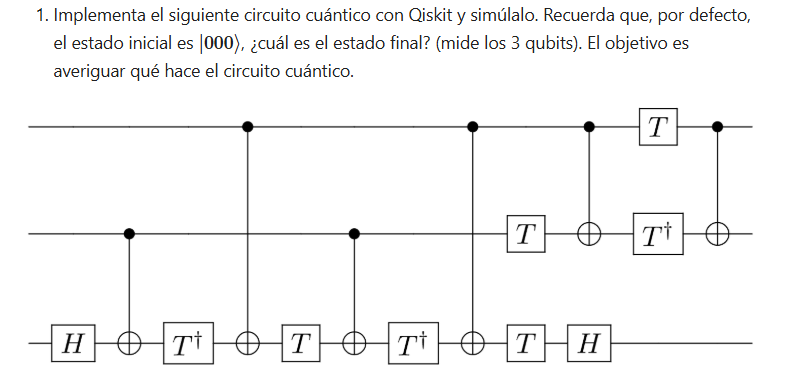

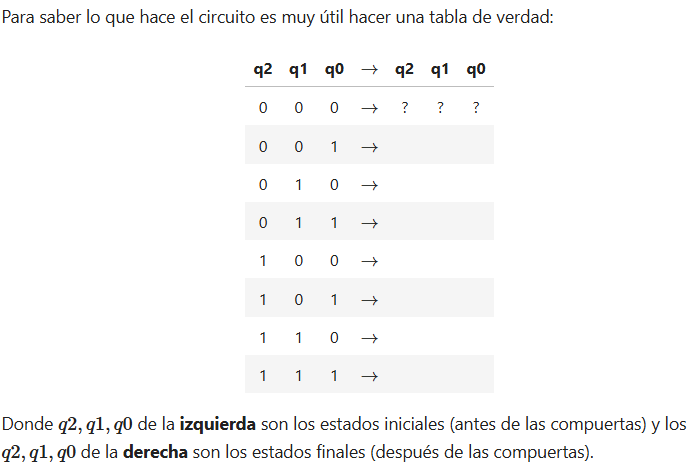
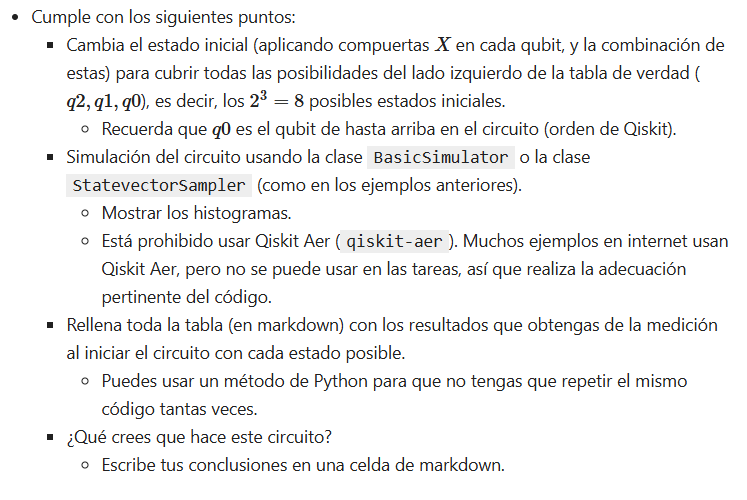

In [3]:
def toffoli_decomposed(qc):
    """Agrega la descomposición del Toffoli al circuito 'qc' ya creado afuera."""
    qc.h(2)
    qc.cx(1, 2)
    qc.barrier()

    qc.tdg(2)
    qc.cx(0, 2)
    qc.barrier()

    qc.t(2)
    qc.cx(1, 2)
    qc.barrier()

    qc.tdg(2)
    qc.cx(0, 2)
    qc.barrier()

    qc.t(2)
    qc.t(1)
    qc.h(2)
    qc.cx(0, 1)
    qc.barrier()

    qc.t(0)
    qc.tdg(1)
    qc.cx(0, 1)
    return qc

In [4]:
def muestreo(qc, legend="Circuito"):
    sampler = StatevectorSampler()
    res = sampler.run([qc]).result()

    probs = None

    # --- Caso A: API con quasi_dists (Qiskit 1.x clásico) ---
    if hasattr(res, "quasi_dists"):
        qdist = res.quasi_dists[0]               # {int: prob}
        width = qc.num_clbits if qc.num_clbits > 0 else qc.num_qubits
        probs = {format(k, f"0{width}b"): float(v) for k, v in qdist.items()}

    # --- Caso B: API con result[0].data.<creg>.get_counts() ---
    if probs is None:
        try:
            # intenta con el nombre por defecto 'c'
            counts = res[0].data.c.get_counts()
        except AttributeError:
            # si tu registro clásico tiene otro nombre, intenta 'meas' o sin nombre
            try:
                counts = res[0].data.meas.get_counts()
            except AttributeError:
                # último recurso: algunos builds exponen .get_counts() directo
                counts = res[0].data.get_counts()

        # normaliza a probabilidades
        total = sum(counts.values()) if isinstance(next(iter(counts.values())), (int, float)) else 1
        if total and total != 1:
            probs = {k: v/total for k, v in counts.items()}
        else:
            probs = dict(counts)

    # --- Graficar (elige uno; plot_distribution funciona siempre con probs) ---
    plot_distribution(probs, title=legend)
    # plot_histogram(probs, title=legend)  # alternativo
    plt.show()

    return probs

## 000

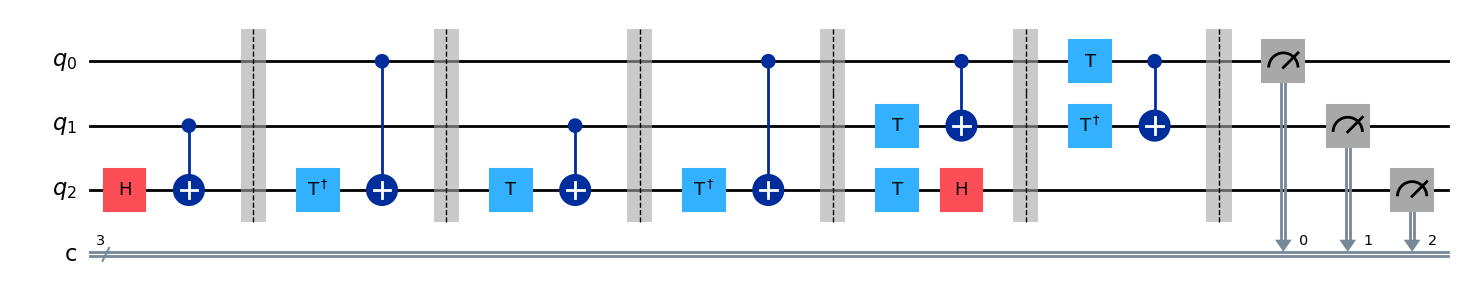

In [5]:
circ1 = QuantumCircuit(3, 3)
toffoli_decomposed(circ1)
circ1.barrier()
circ1.measure([0,1,2], [0,1,2])
circ1.draw("mpl")

In [6]:
probs = muestreo(circ1, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'000': 1.0}


## 001

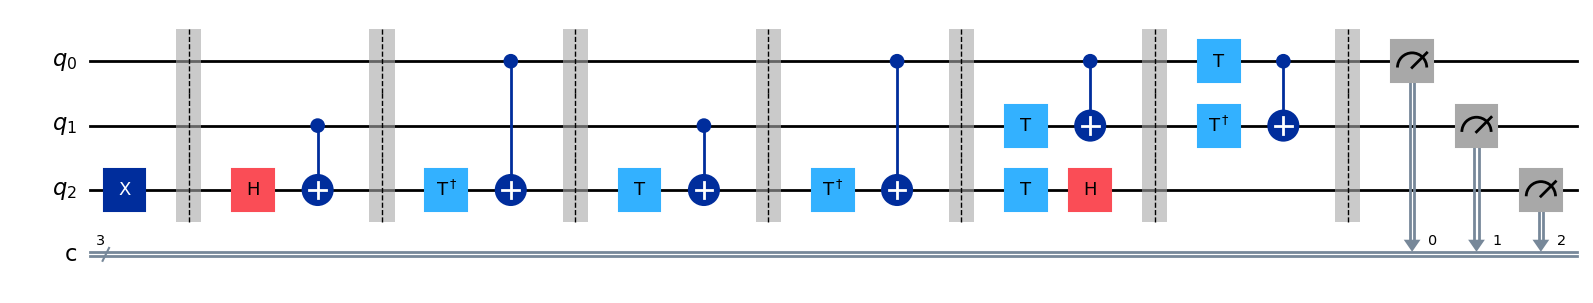

In [7]:
circ2 = QuantumCircuit(3,3)
circ2.x(2)
circ2.barrier()
toffoli_decomposed(circ2)
circ2.barrier()
circ2.measure([0,1,2],[0,1,2])
circ2.draw("mpl")

In [8]:
probs = muestreo(circ2, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'100': 1.0}


## 010

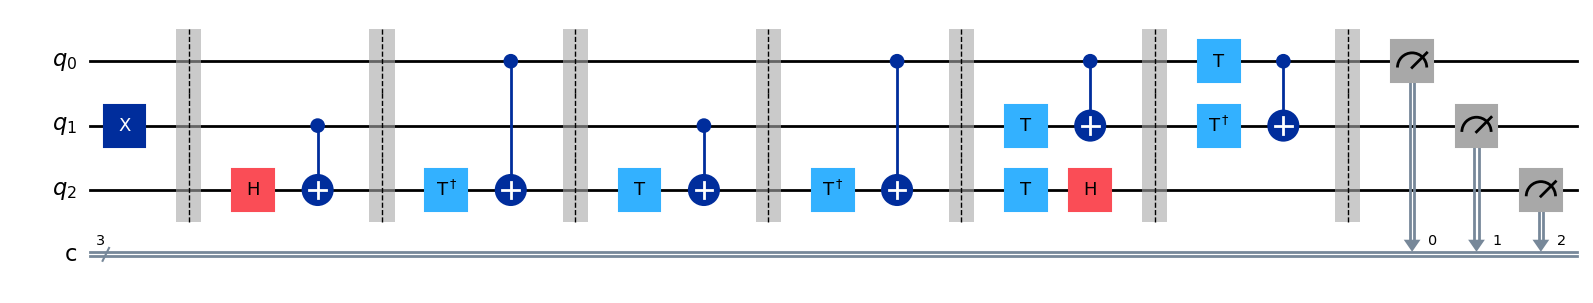

In [9]:
circ3 = QuantumCircuit(3,3)
circ3.x(1)
circ3.barrier()
toffoli_decomposed(circ3)
circ3.barrier()
circ3.measure([0,1,2],[0,1,2])
circ3.draw("mpl")

In [10]:
probs = muestreo(circ3, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'010': 1.0}


## 011

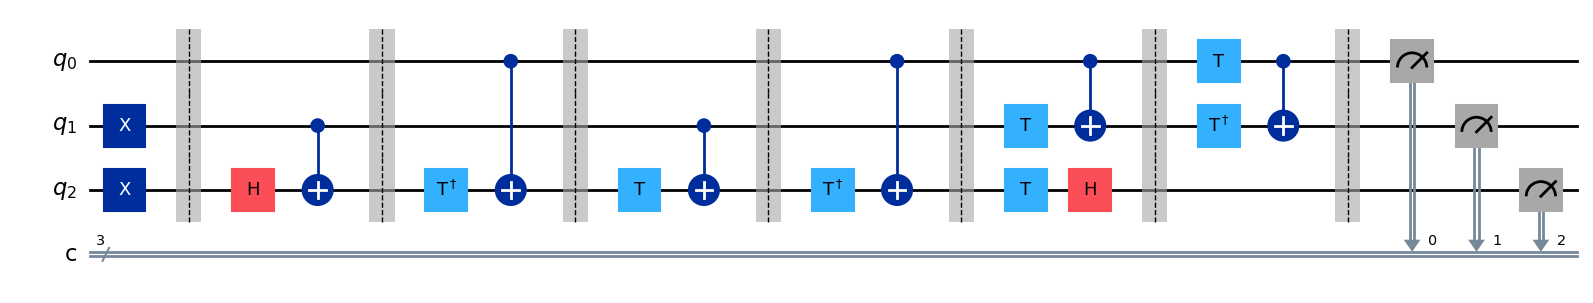

In [11]:
circ4 = QuantumCircuit(3,3)
circ4.x(1)
circ4.x(2)
circ4.barrier()
toffoli_decomposed(circ4)
circ4.barrier()
circ4.measure([0,1,2],[0,1,2])
circ4.draw("mpl")

In [12]:
probs = muestreo(circ4, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'110': 1.0}


## 100

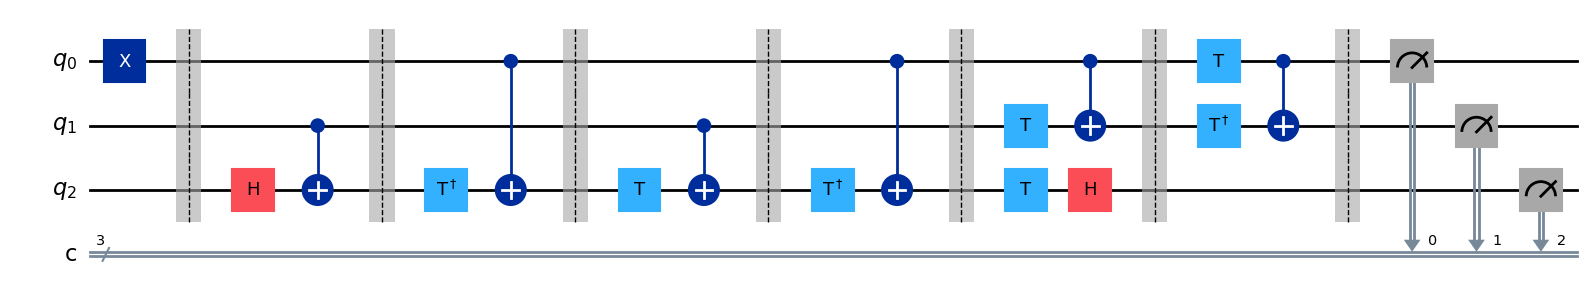

In [13]:
circ5 = QuantumCircuit(3,3)
circ5.x(0)
circ5.barrier()
toffoli_decomposed(circ5)
circ5.barrier()
circ5.measure([0,1,2],[0,1,2])
circ5.draw("mpl")

In [14]:
probs = muestreo(circ5, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'001': 1.0}


## 101

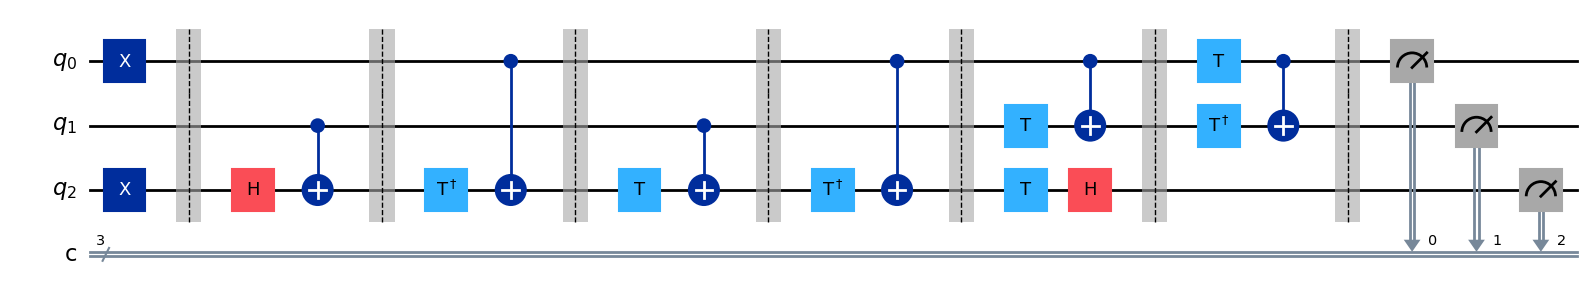

In [15]:
circ6 = QuantumCircuit(3,3)
circ6.x(0)
circ6.x(2)
circ6.barrier()
toffoli_decomposed(circ6)
circ6.barrier()
circ6.measure([0,1,2],[0,1,2])
circ6.draw("mpl")

In [16]:
probs = muestreo(circ6, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'101': 1.0}


## 110

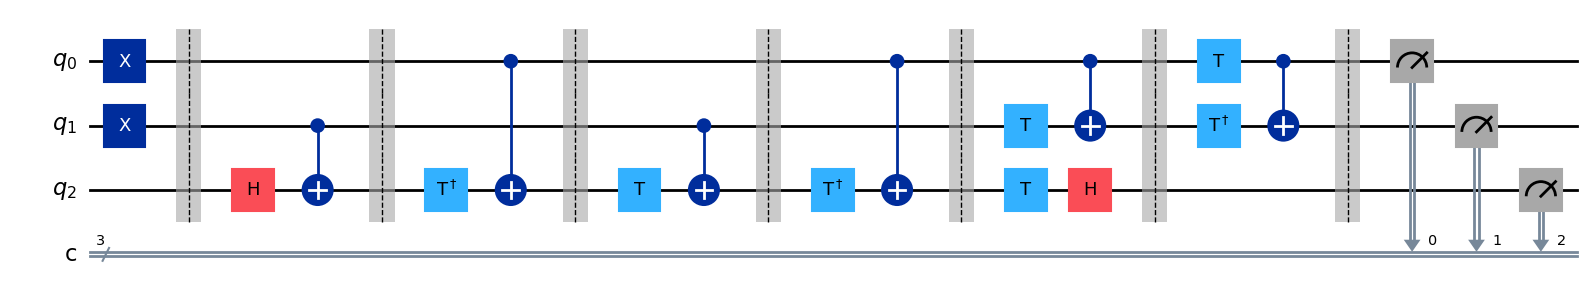

In [17]:
circ7 = QuantumCircuit(3,3)
circ7.x(0)
circ7.x(1)
circ7.barrier()
toffoli_decomposed(circ7)
circ7.barrier()
circ7.measure([0,1,2],[0,1,2])
circ7.draw("mpl")

In [18]:
probs = muestreo(circ7, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'111': 1.0}


## 111

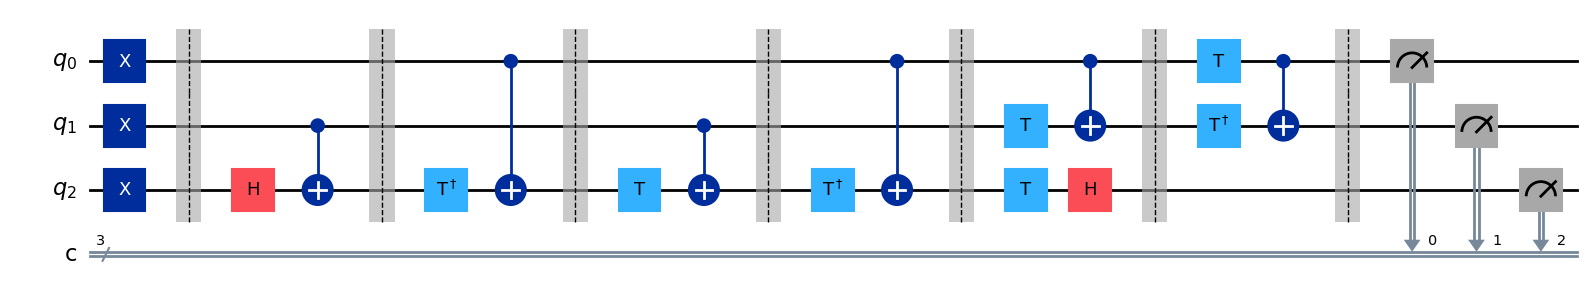

In [19]:
circ8 = QuantumCircuit(3,3)
circ8.x(0)
circ8.x(1)
circ8.x(2)
circ8.barrier()
toffoli_decomposed(circ8)
circ8.barrier()
circ8.measure([0,1,2],[0,1,2])
circ8.draw("mpl")

In [20]:
probs = muestreo(circ8, legend="Toffoli descompuesto")
print("Probabilidades:", probs)

Probabilidades: {'011': 1.0}


### Tabla de verdad (Toffoli: controles q2, q1; objetivo q0)

| q2 q1 q0 (in) | q2 q1 q0 (out) |
|---|---|
| 000 | 000 |
| 001 | 001 |
| 010 | 010 |
| 011 | 011 |
| 100 | 100 |
| 101 | 101 |
| 110 | 111 |
| 111 | 110 |

Este circuito se activa cuando los 2 primeros qubits son 1, cambiaran el valor del tercero.

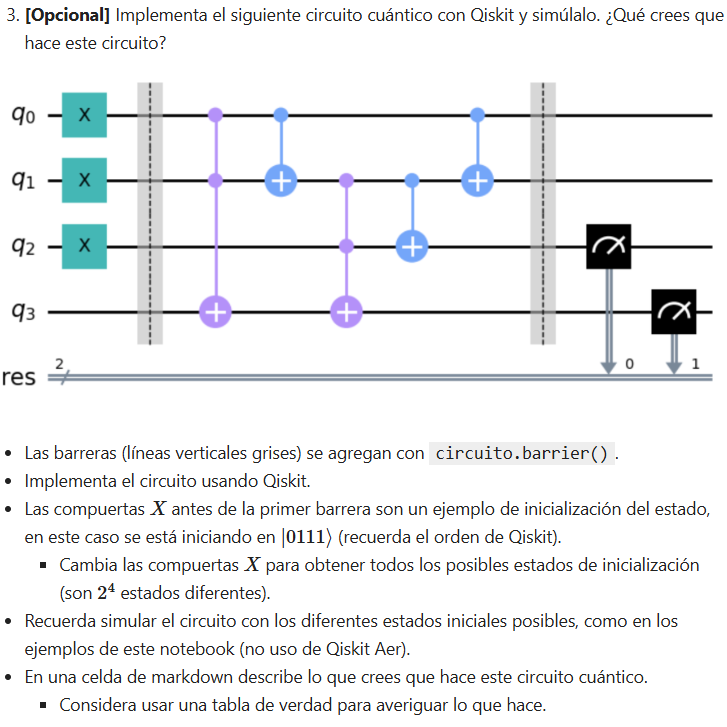

# **3.**

In [21]:
def Sumador(qc):
    qc.mcx([[0],[1]], 3)
    qc.cx(0,1)
    qc.mcx([[1],[2]],3)
    qc.cx(1,2)
    qc.cx(0,1)
    qc.barrier()
    return qc

## 0000

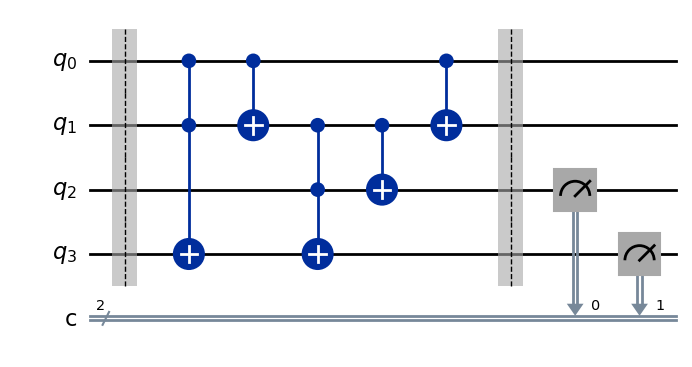

In [22]:
qc1 = QuantumCircuit(4, 2)
qc1.barrier()
Sumador(qc1)
qc1.measure([2,3], [0,1])

qc1.draw("mpl")

In [23]:
probs = muestreo(qc1, legend="Sumador")
print("Probabilidades:", probs)

Probabilidades: {'00': 1.0}


In [31]:
def generar_estado(n):
    """
    Genera un circuito cuántico de 4 qubits inicializado en el estado |n⟩.
    n debe estar entre 0 y 15 (4 bits).
    """
    # Creamos el circuito: 4 qubits, 2 clásicos (para medir si quieres)
    qc = QuantumCircuit(4, 2)

    # Convertimos n a binario con 4 bits
    bits = format(n, "04b")

    # Aplicamos X donde haya un 1 en el binario
    for i, bit in enumerate(bits[::-1]):  # invertimos porque Qiskit numera al revés
        if bit == "1":
            qc.x(i)

    qc.barrier()
    return qc


In [35]:
for i in range(16):
    qc = generar_estado(i)
    qc = QuantumCircuit(4, 2)
    qc.barrier()
    Sumador(qc)
    qc.measure([2,3], [0,1])
    print(qc.draw())
    probs = muestreo(qc, legend="Sumador")
    print("Probabilidades:", probs)

      ░                           ░       
q_0: ─░───■────■──────────────■───░───────
      ░   │  ┌─┴─┐          ┌─┴─┐ ░       
q_1: ─░───■──┤ X ├──■────■──┤ X ├─░───────
      ░   │  └───┘  │  ┌─┴─┐└───┘ ░ ┌─┐   
q_2: ─░───┼─────────■──┤ X ├──────░─┤M├───
      ░ ┌─┴─┐     ┌─┴─┐└───┘      ░ └╥┘┌─┐
q_3: ─░─┤ X ├─────┤ X ├───────────░──╫─┤M├
      ░ └───┘     └───┘           ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1 
Probabilidades: {'00': 1.0}
      ░                           ░       
q_0: ─░───■────■──────────────■───░───────
      ░   │  ┌─┴─┐          ┌─┴─┐ ░       
q_1: ─░───■──┤ X ├──■────■──┤ X ├─░───────
      ░   │  └───┘  │  ┌─┴─┐└───┘ ░ ┌─┐   
q_2: ─░───┼─────────■──┤ X ├──────░─┤M├───
      ░ ┌─┴─┐     ┌─┴─┐└───┘      ░ └╥┘┌─┐
q_3: ─░─┤ X ├─────┤ X ├───────────░──╫─┤M├
      ░ └───┘     └───┘           ░  ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1 
Probabilidades: {'00': 1.0

Se trata del sumador cuántico.